In [18]:
pip install tensorflow matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [20]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential #build model step by step , one layer after another
from tensorflow.keras.layers import Dense, Flatten #convert 2D to 1D
from tensorflow.keras.utils import to_categorical #Converts labels like 5 into [0,0,0,0,0,1,0,0,0,0] (one-hot encoded).


In [22]:
#load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [24]:
#print the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


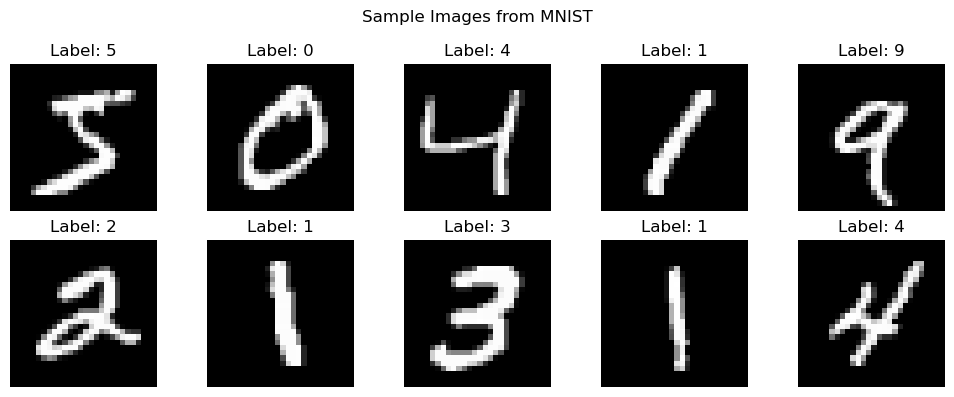

In [26]:
#to see the sample images from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST")
plt.tight_layout()
plt.show()


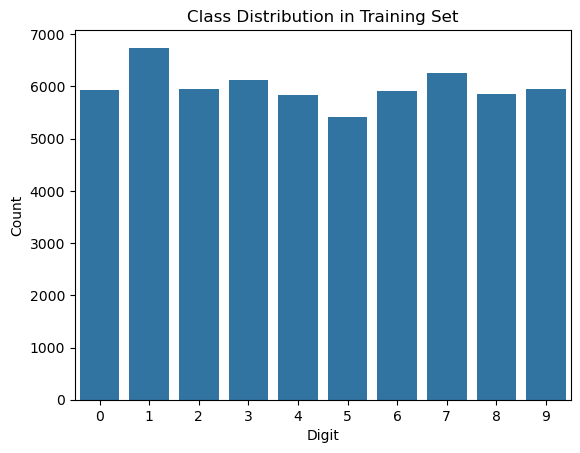

In [28]:
#to see the class distribution of training dataset
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


In [32]:
# Normalize pixel values 255.0 to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# convert into One-hot encode labels 
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


In [34]:

model = Sequential([
    Flatten(input_shape=(28, 28)), #convert img 2D to 1D array
    Dense(128, activation='relu'), #A fully-connected layer (every neuron connected to next layer).
    Dense(64, activation='relu'),# 64 neurons using relu (non liniear) activation
    Dense(10, activation='softmax')  # 10 output classes , softmax (give probability)
])

# Compile the model
model.compile(optimizer='adam', #model learning automatically
              loss='categorical_crossentropy', #function to measure how wrong the model during training
              metrics=['accuracy']) # tells how accurate the model is 

# Model summary
model.summary()


C:\Users\RENUKA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4988 - loss: 1.8949 - val_accuracy: 0.8052 - val_loss: 0.6951
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8183 - loss: 0.6375 - val_accuracy: 0.8758 - val_loss: 0.4467
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8744 - loss: 0.4393 - val_accuracy: 0.8923 - val_loss: 0.3730
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.3822 - val_accuracy: 0.9008 - val_loss: 0.3417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8985 - loss: 0.3524 - val_accuracy: 0.9048 - val_loss: 0.3213
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9032 - loss: 0.3293 - val_accuracy: 0.9125 - val_loss: 0.3055
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.3173 - val_accuracy: 0.9171 - val_loss: 0.2924
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.3091 - val_accuracy: 0.

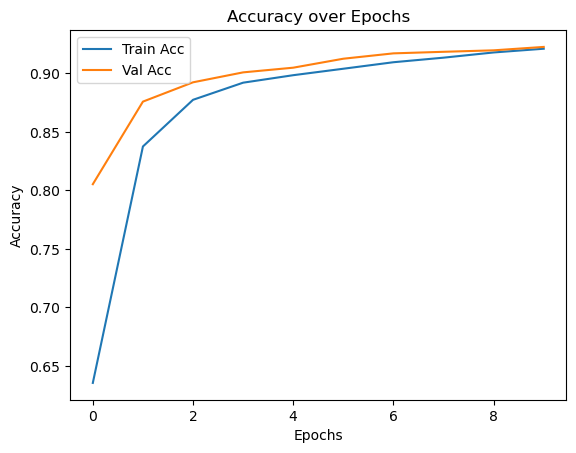

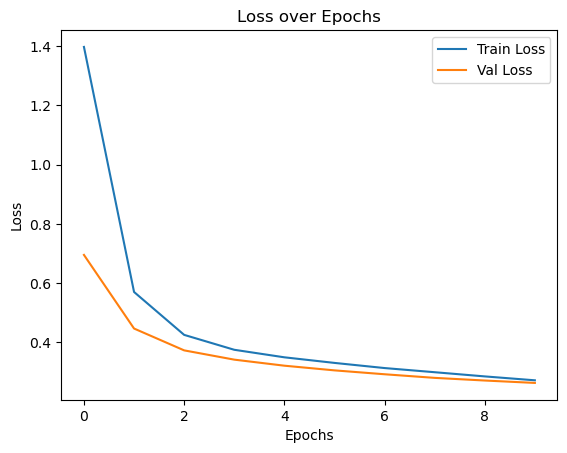

In [38]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [40]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_oh, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 91.98%
